[nltk_data] Downloading package stopwords to C:\Users\Mothilal
[nltk_data]     Chowdary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Model Accuracy: 0.90
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



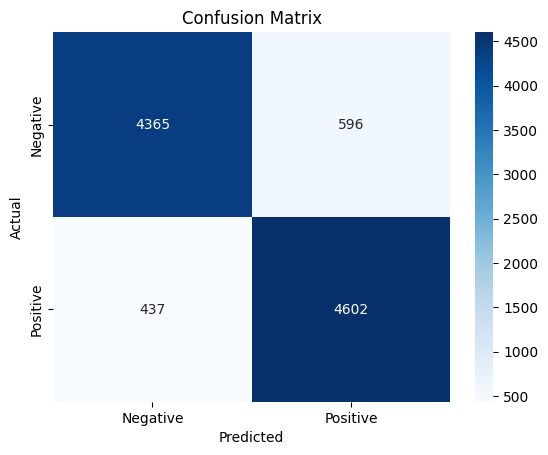

Review: Absolutely love it! Best purchase ever. --> Sentiment: Negative
Review: Horrible, I regret buying this. --> Sentiment: Negative


In [8]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# **Load Dataset from Kaggle**
df = pd.read_csv("IMDB Dataset.csv") 

# Display first few rows
print(df.head())

# **Text Preprocessing Function**
def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing
df["cleaned_review"] = df["review"].apply(preprocess_text)

# **Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_review"], df["sentiment"], test_size=0.2, random_state=42)

# **TF-IDF Vectorization**
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# **Train Logistic Regression Model**
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# **Evaluate Model**
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# **Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Predict Sentiment for New Reviews**
new_reviews = ["Absolutely love it! Best purchase ever.", "Horrible, I regret buying this."]
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)
predictions = model.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} --> Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")
